In [1]:
from numpy import array, linspace, sqrt, polyfit, poly1d
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=12)
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

In [ ]:
'''
n_stator_blades = 100

k = 1.4
G = array([0.41621, 0.415999, 0.413537, 0.410579, 0.404995, 0.398617, 0.390799, 0.362387]) * n_stator_blades
P1 = 315600
P3 = array([360722, 367309, 374736, 381971, 389181, 396108, 403642, 411152])
T1 = 418.2
T3 = array([443.355, 444.896, 446.533, 448.349, 450.275, 452.259, 453.951, 454.937])
'''

'\nG = array([0.41621, 0.415999, 0.413537, 0.410579, 0.404995, 0.398617, 0.390799, 0.362387]) * n_stator_blades\nP1 = 315600\nP3 = array([360722, 367309, 374736, 381971, 389181, 396108, 403642, 411152])\nT1 = 418.2\nT3 = array([443.355, 444.896, 446.533, 448.349, 450.275, 452.259, 453.951, 454.937])\n'

In [4]:
T0, P0, G0 = 418.2, 315600, 34.81

n_stator_blades = 142

k = 1.4
G = array([0.290532, 0.28969, 0.289019, 0.28721, 0.28361, 0.276794, 0.278907, 0.240881, ]) * n_stator_blades
P1 = 315600
P3 = array([358667, 365497, 372510, 380436, 388442, 397306, 404188, 410536, ])
T1 = 418.2
T3 = array([447.363, 448.265, 449.405, 450.617, 451.757, 453.228, 455.646, 456.899, ])

pi = P3 / P1
tau = T3 / T1
eff = (pi ** ((k-1)/k) - 1) / (tau - 1)  # КПД*

G_ = G * (P0/P1) * sqrt(T1/T0)  # приведенный расход
G__ = G_ / G0  # приведенный относительный расход

In [5]:
pd.DataFrame({'G': G, 'G_': G_, 'G__': G__,
              'P*_inlet': [P1] * len(G), 'P*_outlet': P3, 'π*': pi, 
              'T*_inlet': [T1] * len(G), 'T*_outlet': T3, 'τ*': tau, 
              'η*': eff})

G         G_       G__  P*_inlet  P*_outlet        π*  T*_inlet  \
0  41.255544  41.255544  1.185164    315600     358667  1.136461     418.2   
1  41.135980  41.135980  1.181729    315600     365497  1.158102     418.2   
2  41.040698  41.040698  1.178992    315600     372510  1.180323     418.2   
3  40.783820  40.783820  1.171612    315600     380436  1.205437     418.2   
4  40.272620  40.272620  1.156927    315600     388442  1.230805     418.2   
5  39.304748  39.304748  1.129122    315600     397306  1.258891     418.2   
6  39.604794  39.604794  1.137742    315600     404188  1.280697     418.2   
7  34.205102  34.205102  0.982623    315600     410536  1.300811     418.2   

   T*_outlet        τ*        η*  
0    447.363  1.069735  0.533800  
1    448.265  1.071891  0.595755  
2    449.405  1.074617  0.650088  
3    450.617  1.077516  0.707395  
4    451.757  1.080242  0.761817  
5    453.228  1.083759  0.811759  
6    455.646  1.089541  0.818009  
7    456.899  1.092537  0.843278

In [6]:
G__ -= 0.11
pi += 0.1

In [7]:
f = poly1d(polyfit(G__, pi, 2))

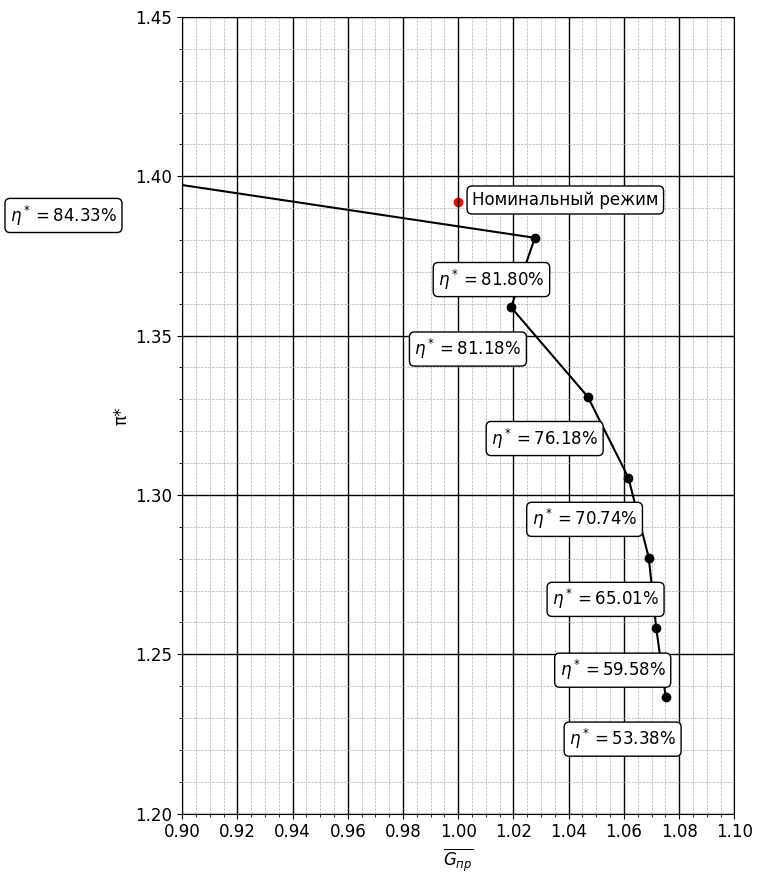

In [8]:
shift = (0.005, -0.001)

plt.figure(figsize=(8, 9))
#plt.title('Характеристика компрессора', fontsize=14)
plt.xlabel(r'$\overline{G_{пр}}$'), plt.ylabel('π*', fontsize=12)

plt.minorticks_on()
plt.grid(which='major', linewidth=1, color='black')
plt.grid(which='minor', linewidth=0.5, linestyle='--')
plt.xlim([0.9, 1.1]), plt.ylim([1.2, 1.45])
plt.xticks(linspace(0.9, 1.1, 11))
plt.yticks(linspace(1.2, 1.45,6))

plt.plot(G__, pi, color='black', marker='o', markersize=6)
#plt.plot(linspace(0.9, 1.1, 100), f(linspace(0.9, 1.1, 100)))
for i, e in enumerate(eff):
    plt.text(G__[i] - 0.035, pi[i] - 0.015, fr'$\eta^*=${e*100:.2f}%',
             bbox={'boxstyle':'round', 'facecolor': '#FFFFFF'})
plt.scatter([1], [1.392], color='red')
plt.text(1 + shift[0], 1.392 + shift[1], 'Номинальный режим',  bbox={'boxstyle':'round', 'facecolor': 'white'})

plt.tight_layout()
plt.show()